In [ ]:
### 📄 Notebook Description — Multivariate Analysis

In this notebook, I performed multivariate analysis on the combined ODI dataset (`CombinedcleanedOdiStats.csv`).  
Using **Seaborn** and **Matplotlib**, I generated correlation heatmaps and multivariate comparison plots to study how multiple features interact with each other.

This analysis includes both:
- **Existing features** (Runs, Average, StrikeRate, Boundaries, etc.)
- **Engineered features** (ConversionRate, Landmarks, BoundariesHit, Ratings, etc.)

The goal of this notebook is to understand deeper relationships between multiple variables at the same time and identify which features contribute most to overall player performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for clean visuals
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [2]:
df=pd.read_csv("addedfeaturesodistats.csv")
df

,Unnamed: 0,PlayerName,Matches,Innings,Average,StrikeRate,HighestScore,4s,6s,50s,...,Boundary%,Landmarks,BoundariesHit,RunsRating,AvgRating,SRRating,LandmarksRating,BoundariesRating,TotalRating,Rating10
0,0,Sachin Tendulkar,463,452,44.83,86.23,200,2016.0,195.0,96,...,50.11,145,2211.0,5,5,2,5,5,22,8.8
1,1,Virat Kohli,305,293,57.71,93.26,183,1332.0,152.0,75,...,43.77,126,1484.0,5,5,3,5,5,23,9.2
2,2,Rohit Sharma,276,268,49.22,92.66,264,1066.0,349.0,59,...,55.92,92,1415.0,5,5,3,5,5,23,9.2
3,3,Sourav Ganguly,311,300,41.02,73.70,183,1122.0,190.0,72,...,49.53,94,1312.0,5,5,2,5,5,22,8.8
4,4,Rahul Dravid,344,318,39.16,71.23,153,950.0,42.0,83,...,37.21,95,992.0,5,5,2,5,5,22,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,366,Bindeshwari Goyal,4,1,0.00,25.00,1,NaN,NaN,0,...,NaN,0,NaN,1,1,1,1,5,9,3.6
367,367,Samantha Lobatto,3,2,0.00,12.50,1,NaN,NaN,0,...,NaN,0,NaN,1,1,1,1,5,9,3.6
368,368,Anjali Sharma,3,3,0.33,NaN,1,NaN,NaN,0,...,NaN,0,NaN,1,1,5,1,5,13,5.2
369,369,Rita Patel,1,1,1.00,NaN,1,NaN,NaN,0,...,NaN,0,NaN,1,1,5,1,5,13,5.2


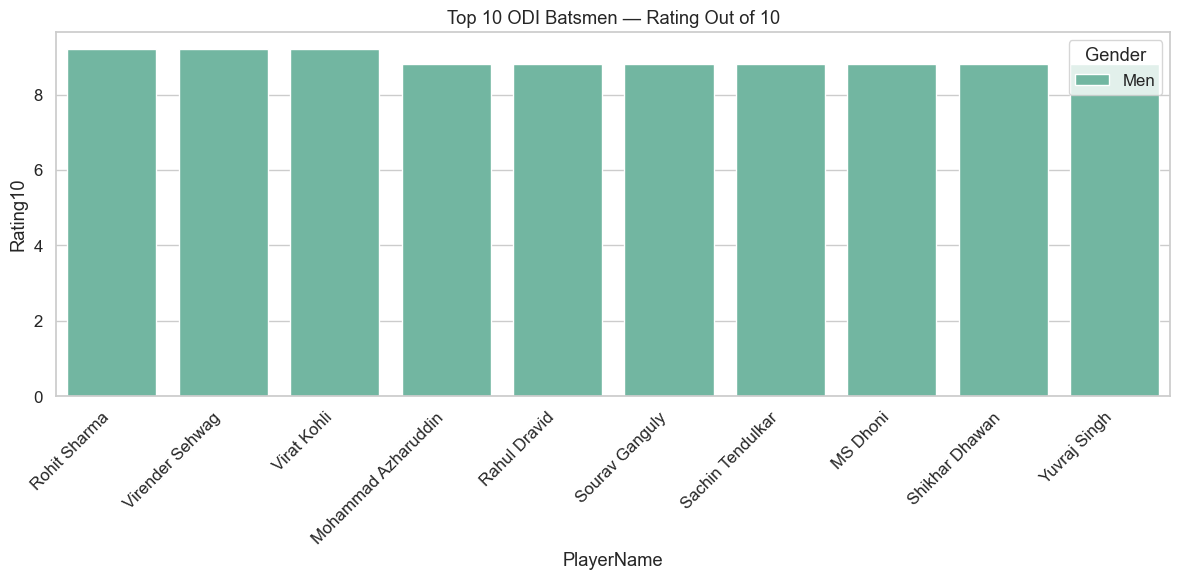

In [3]:
# ------------------ TOP 10 ODI BATSMEN (RATING OUT OF 10) ------------------

df_top_rate = df.sort_values(by='Rating10', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=df_top_rate, x='PlayerName', y='Rating10', hue='Gender')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 ODI Batsmen — Rating Out of 10")
plt.tight_layout()
plt.show()

In [4]:
# ------------------ GREAT ODI BATSMEN TABLE ------------------

great_odi = df[(df['Average'] > 45) & 
               (df['StrikeRate'] >= 75) & 
               (df['Innings'] > 25)]

cols = ['PlayerName', 'Gender', 'Matches', 'Innings', 'Runs',
        'Average', 'StrikeRate', '100s', '50s', '4s', '6s']

great_odi = great_odi[cols].sort_values(by='StrikeRate', ascending=False).reset_index(drop=True)

print(great_odi)

        PlayerName Gender  Matches  Innings   Runs  Average  StrikeRate  100s  \
0     Shubman Gill    Men       58       58   2818    56.36       99.22     8   
1     Shreyas Iyer    Men       73       67   2917    47.81       99.01     5   
2      Virat Kohli    Men      305      293  14255    57.71       93.26    51   
3     Rohit Sharma    Men      276      268  11370    49.22       92.66    33   
4  Smriti Mandhana  Women      117      117   5322    48.38       90.52    14   
5         KL Rahul    Men       88       81   3092    48.31       88.41     7   
6         MS Dhoni    Men      350      297  10773    50.57       87.56    10   
7    Ambati Rayudu    Men       55       50   1694    47.05       79.04     3   

   50s      4s     6s  
0   15   318.0   60.0  
1   23   270.0   72.0  
2   75  1332.0  152.0  
3   59  1066.0  349.0  
4   34   642.0   74.0  
5   18   238.0   69.0  
6   73   826.0  229.0  
7   10   145.0   30.0  


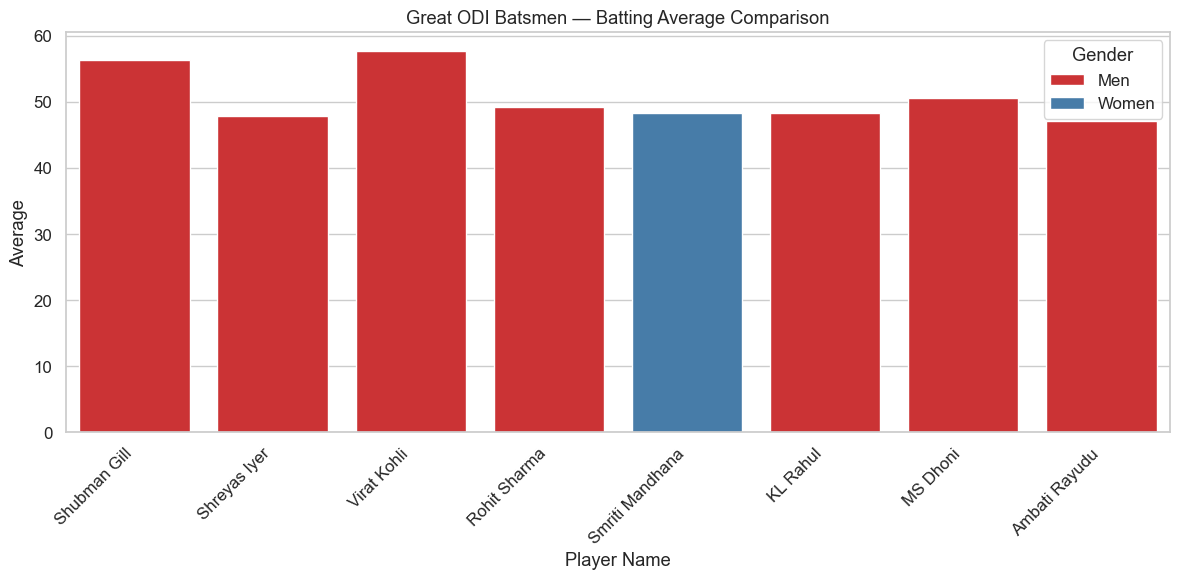

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=great_odi,
    x='PlayerName',
    y='Average',
    hue='Gender',
    palette='Set1'
)

plt.xticks(rotation=45, ha='right')
plt.title("Great ODI Batsmen — Batting Average Comparison")
plt.xlabel("Player Name")
plt.ylabel("Average")
plt.tight_layout()
plt.show()

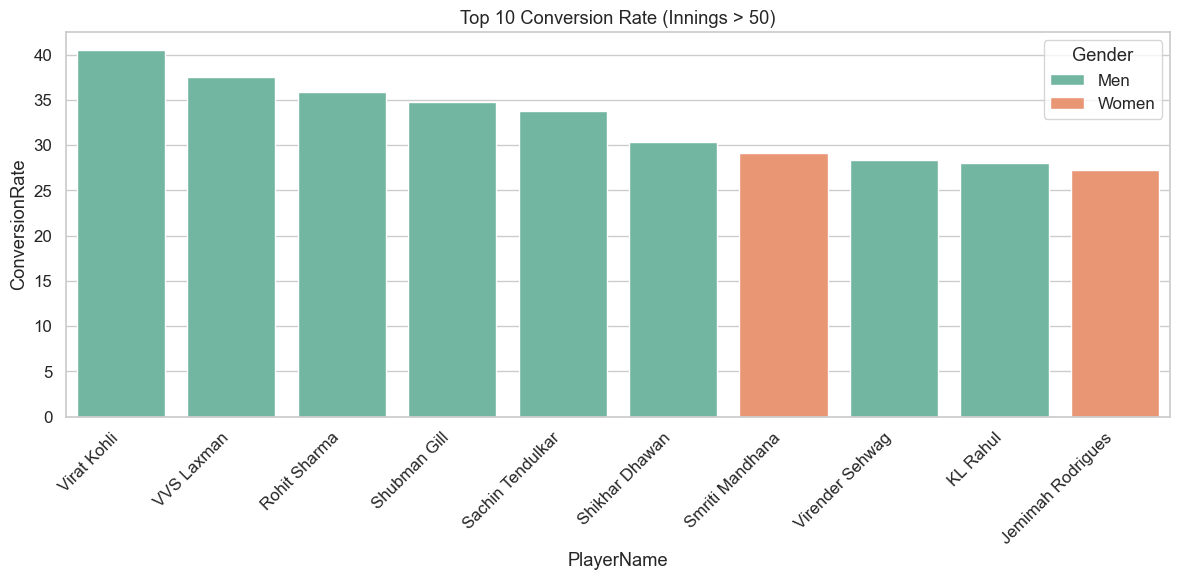

In [6]:
# ------------------ TOP 10 BY CONVERSION RATE ------------------

plt.figure(figsize=(12,6))

df_filtered = df[df['Innings'] > 50]
df_top10 = df_filtered.sort_values(by='ConversionRate', ascending=False).head(10)

sns.barplot(data=df_top10, x='PlayerName', y='ConversionRate', hue='Gender')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Conversion Rate (Innings > 50)")
plt.tight_layout()
plt.show()

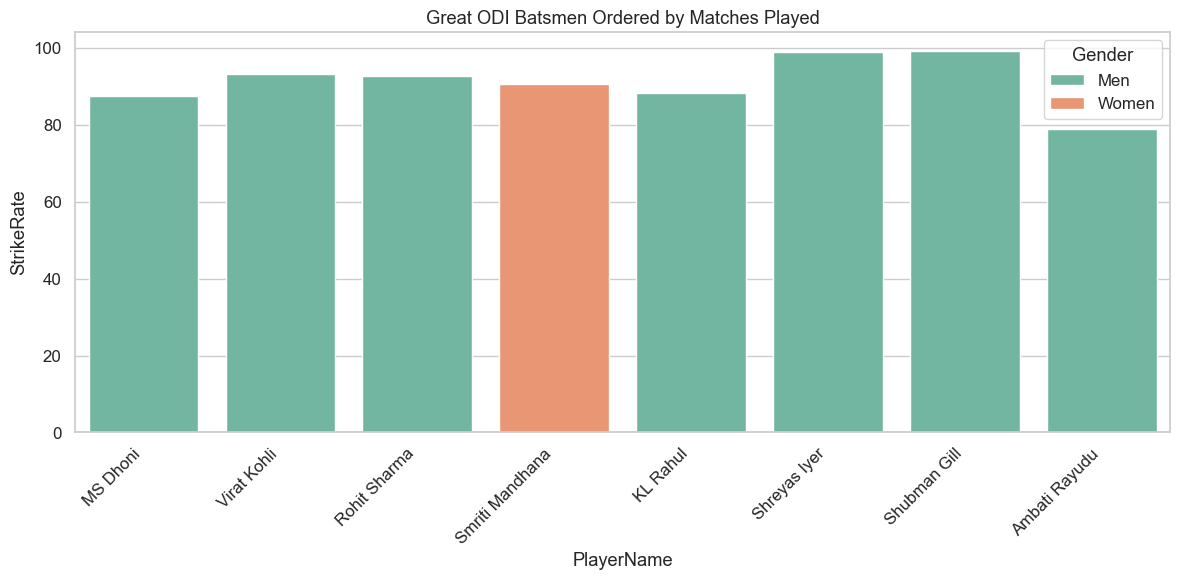

In [7]:
# ------------------ ODI BATSMEN ORDERED BY MATCHES ------------------

great_odi_sorted = great_odi.sort_values(by='Matches', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=great_odi_sorted, x='PlayerName', y='StrikeRate', hue='Gender', palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.title("Great ODI Batsmen Ordered by Matches Played")
plt.tight_layout()
plt.show()

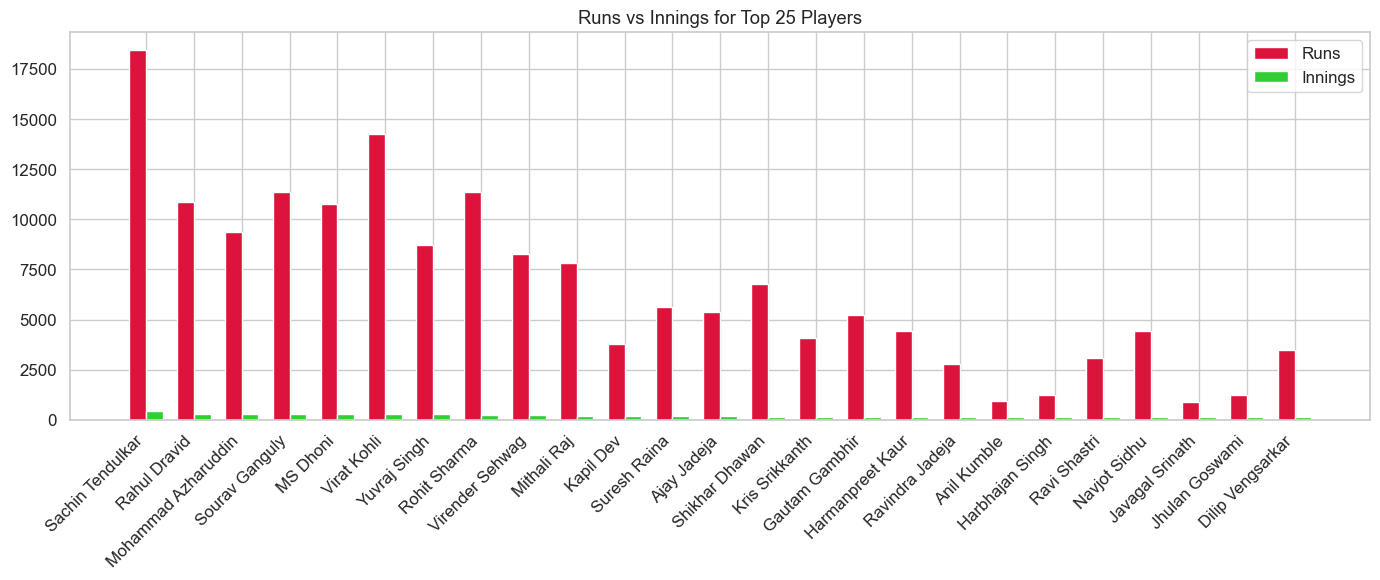

In [8]:
# ------------------ RUNS VS INNINGS ------------------

df_top = df.sort_values(by='Innings', ascending=False).head(25)

import numpy as np
x = np.arange(len(df_top))
width = 0.35

plt.figure(figsize=(14,6))
plt.bar(x - width/2, df_top['Runs'], width, label='Runs', color='crimson')
plt.bar(x + width/2, df_top['Innings'], width, label='Innings', color='limegreen')

plt.title("Runs vs Innings for Top 25 Players")
plt.xticks(x, df_top['PlayerName'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


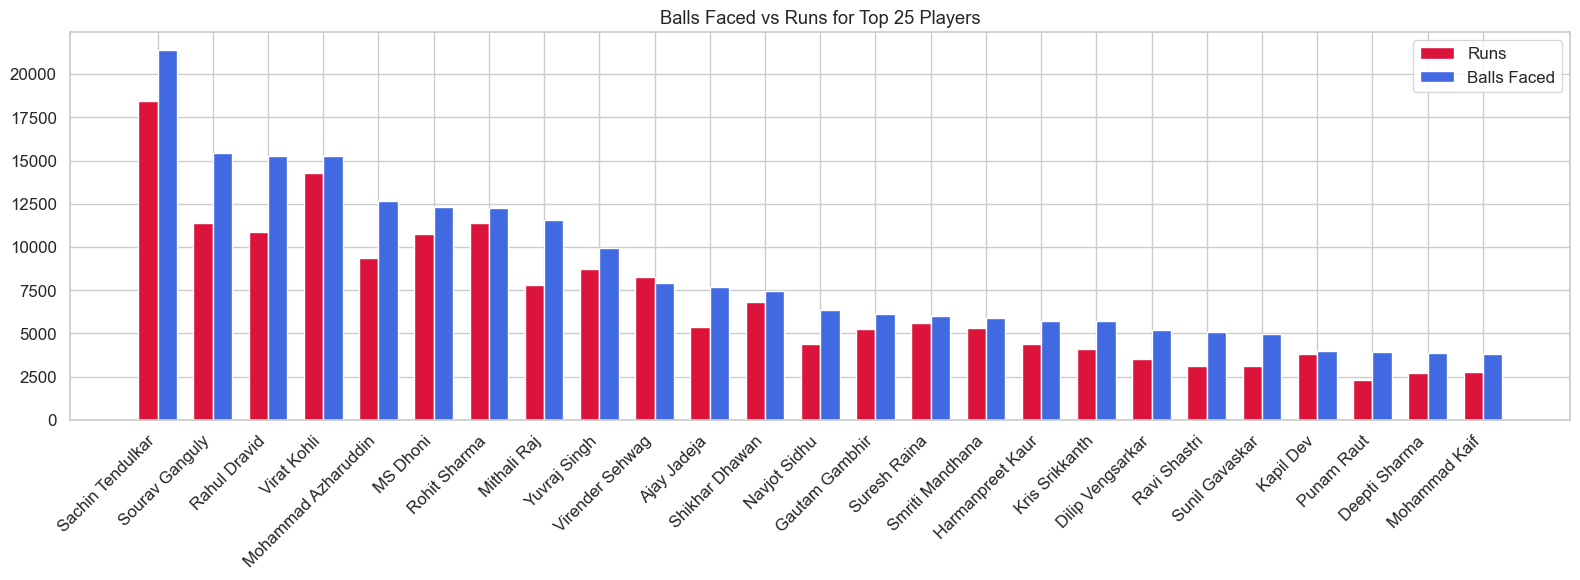

In [9]:
# ------------------ BALLS FACED VS RUNS ------------------

df_top = df.sort_values(by='BallsFaced', ascending=False).head(25)

x = np.arange(len(df_top))
width = 0.35

plt.figure(figsize=(16,6))
plt.bar(x - width/2, df_top['Runs'], width, label='Runs', color='crimson')
plt.bar(x + width/2, df_top['BallsFaced'], width, label='Balls Faced', color='royalblue')

plt.title("Balls Faced vs Runs for Top 25 Players")
plt.xticks(x, df_top['PlayerName'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


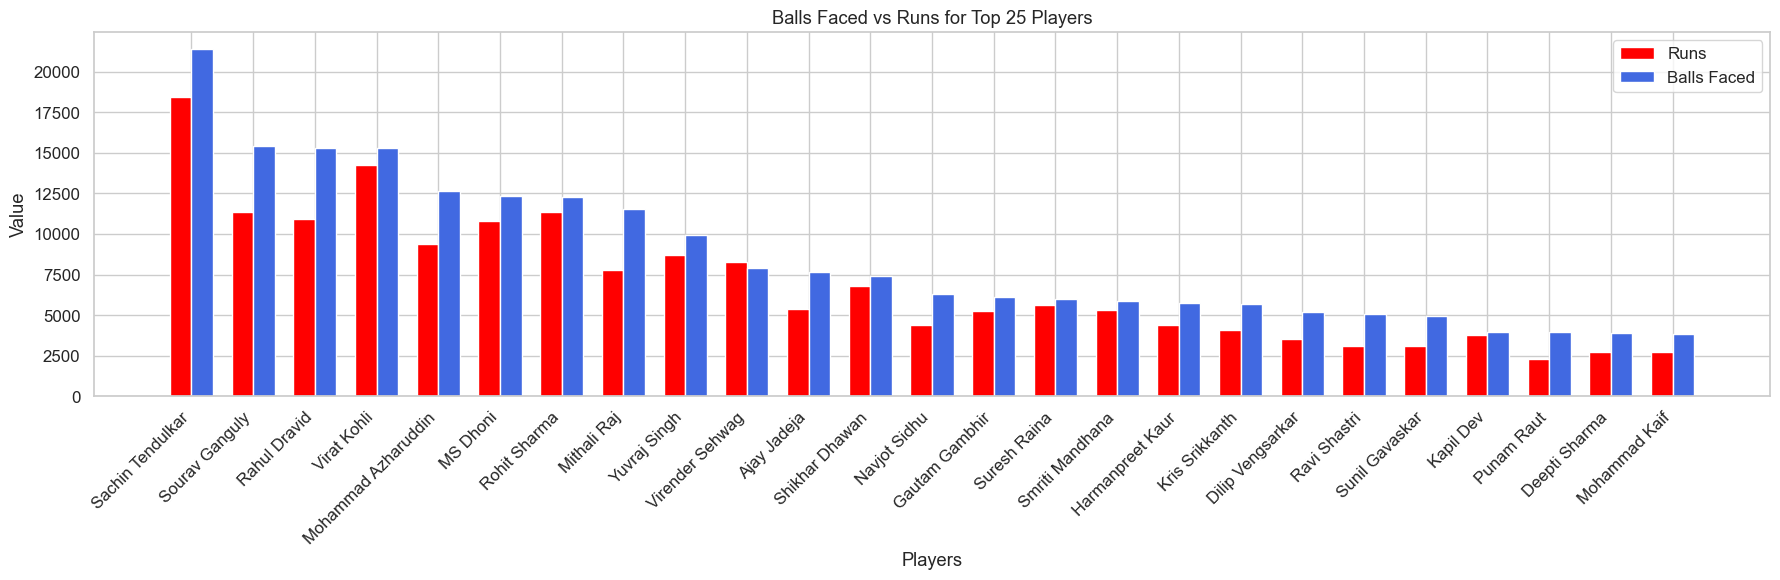

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Take Top 25 players based on Balls Faced
df_top = df.sort_values(by='BallsFaced', ascending=False).head(25)

x = np.arange(len(df_top))
width = 0.35

plt.figure(figsize=(18,6))

# Red = Runs
plt.bar(x - width/2, df_top['Runs'], width, 
        label='Runs', color='red')

# Blue = Balls Faced
plt.bar(x + width/2, df_top['BallsFaced'], width, 
        label='Balls Faced', color='royalblue')

plt.title("Balls Faced vs Runs for Top 25 Players")
plt.xlabel("Players")
plt.ylabel("Value")

plt.xticks(x, df_top['PlayerName'], rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()


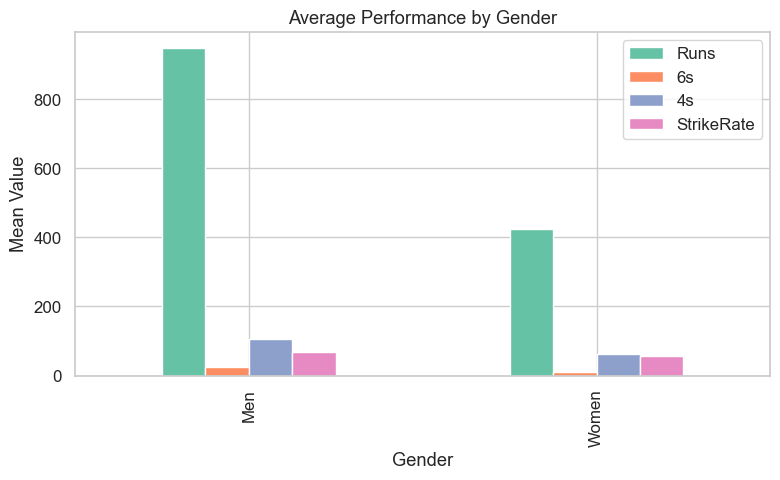

In [11]:
# ------------------ GENDER PERFORMANCE COMPARISON ------------------

grouped = df.groupby('Gender')[['Runs', '6s', '4s', 'StrikeRate']].mean().reset_index()

grouped.plot(x='Gender', kind='bar', figsize=(8,5), title='Average Performance by Gender')
plt.ylabel("Mean Value")
plt.tight_layout()
plt.show()


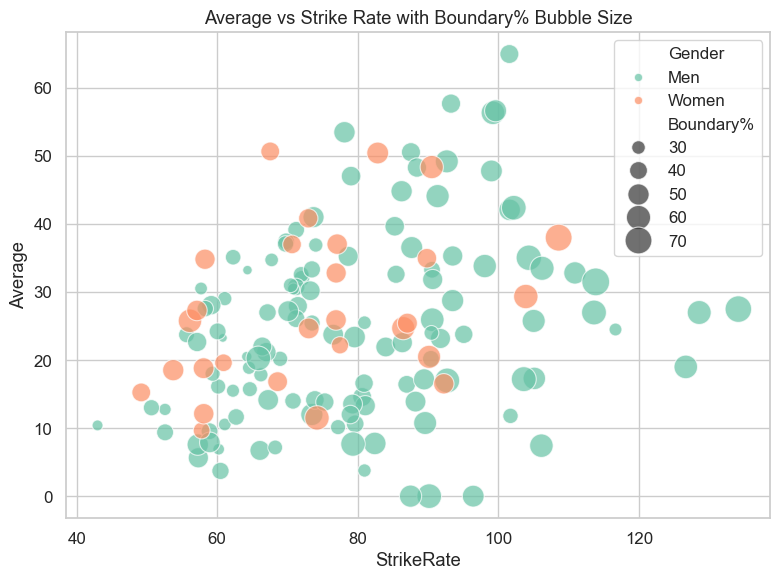

In [12]:
# ------------------ STRIKE RATE vs AVERAGE ------------------

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='StrikeRate',
    y='Average',
    hue='Gender',
    size='Boundary%',
    sizes=(40, 400),
    alpha=0.7
)

plt.title("Average vs Strike Rate with Boundary% Bubble Size")
plt.tight_layout()
plt.show()


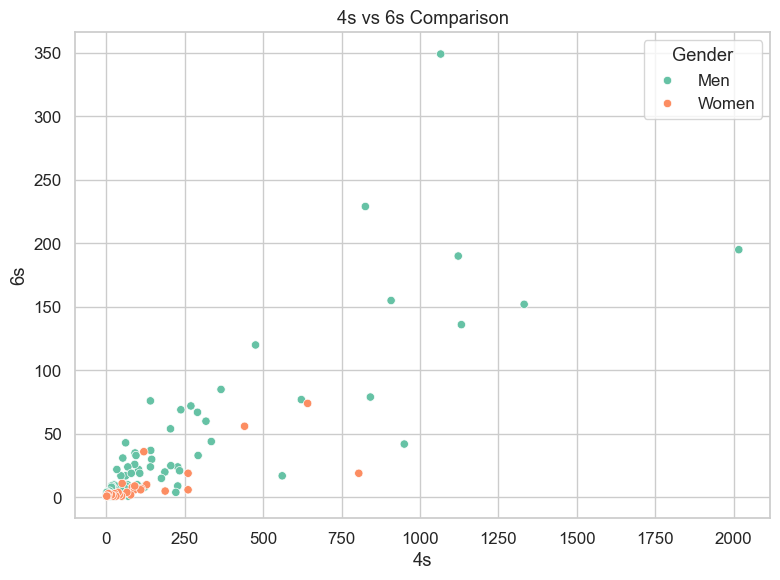

In [13]:
# ------------------ 4s VS 6s SCATTER ------------------

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='4s', y='6s', hue='Gender')
plt.title("4s vs 6s Comparison")
plt.tight_layout()
plt.show()
